In [2]:
import pandas as pd

# Load the CSV file
file_path = './homework_1.1.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,X1,X2,X3,Y
0,-0.440646,-0.390227,0.156718,-0.877671
1,-3.810099,-1.304665,-1.105117,-10.130388
2,-1.425451,-0.340049,1.115908,0.284068
3,-1.325750,0.161906,-0.254670,-1.994344
4,3.120263,1.487343,-1.164839,2.030030


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
X = df[['X1', 'X2', 'X3']]
y = df['Y']

# Split the data (optional, for demonstration)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Output coefficients and performance
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Intercept: 0.0004814816948028877
Coefficients: [1.00924425 1.95320673 2.96066314]
Mean Squared Error: 0.2703874410064394
R^2 Score: 0.9908211302539603


In [4]:
# Print the coefficient of X1
print('Coefficient of X1:', model.coef_[0])

Coefficient of X1: 1.009244254451761


In [5]:
# Determine which option is closest to the coefficient of X1
options = {'A': 2, 'B': 1, 'C': 3}
coef_x1 = model.coef_[0]
closest_option = min(options, key=lambda k: abs(options[k] - coef_x1))
print(f"Coefficient of X1: {coef_x1}")
print(f"Closest option: Option {closest_option} ({options[closest_option]})")

Coefficient of X1: 1.009244254451761
Closest option: Option B (1)


In [6]:
# Calculate the difference between simple and multiple regression coefficients for each Xi
results = {}
for xi in ['X1', 'X2', 'X3']:
    # Simple regression: Y ~ Xi
    model_simple = LinearRegression()
    model_simple.fit(df[[xi]], df['Y'])
    coef_simple = model_simple.coef_[0]
    # Multiple regression: Y ~ X1 + X2 + X3 (already fit as 'model')
    idx = ['X1', 'X2', 'X3'].index(xi)
    coef_multiple = model.coef_[idx]
    diff = abs(coef_simple - coef_multiple)
    results[xi] = diff

# Find Xi with the greatest difference
greatest_xi = max(results, key=results.get)
print('Differences between simple and multiple regression coefficients:', results)
print(f"Xi with the greatest difference: {greatest_xi}")

Differences between simple and multiple regression coefficients: {'X1': np.float64(0.8325168447197537), 'X2': np.float64(2.1304058516969677), 'X3': np.float64(0.13637805775966516)}
Xi with the greatest difference: X2


In [8]:
import statsmodels.api as sm

# Add constant for intercept
X_with_const = sm.add_constant(X)
model_sm = sm.OLS(y, X_with_const).fit()

# Get t-statistics for each coefficient (excluding intercept)
t_stats = model_sm.tvalues[1:]
most_significant = t_stats.abs().idxmax()
print('t-statistics for each coefficient:')
print(t_stats)
print(f"Most significant coefficient (by t-statistic): {most_significant}")

t-statistics for each coefficient:
X1     60.984011
X2     53.283212
X3    196.645240
dtype: float64
Most significant coefficient (by t-statistic): X3


In [9]:
# Use NearestNeighbors to match X=0 to X=1 based on Z in homework_1.2.csv
from sklearn.neighbors import NearestNeighbors

# Load the new dataset
file_path_12 = './homework_1.2.csv'
df2 = pd.read_csv(file_path_12)

# Split into X=0 and X=1 groups
x0 = df2[df2['X'] == 0].reset_index(drop=True)
x1 = df2[df2['X'] == 1].reset_index(drop=True)

# Fit NearestNeighbors on X=1 group using Z
nn = NearestNeighbors(n_neighbors=1)
nn.fit(x1[['Z']])

distances, indices = nn.kneighbors(x0[['Z']])

# For each X=0, find the best match in X=1
matches = x1.iloc[indices.flatten()].reset_index(drop=True)

# Combine results for inspection
matched_df = x0.copy()
matched_df['matched_X1_index'] = indices.flatten()
matched_df['matched_X1_Z'] = matches['Z'].values
matched_df['distance'] = distances.flatten()

print(matched_df[['Z', 'matched_X1_Z', 'distance']])

           Z  matched_X1_Z  distance
0   0.548814      0.568434  0.019620
1   0.602763      0.604846  0.002082
2   0.544883      0.568434  0.023551
3   0.423655      0.414263  0.009392
4   0.528895      0.568434  0.039539
5   0.568045      0.568434  0.000389
6   0.071036      0.120197  0.049161
7   0.087129      0.120197  0.033067
8   0.020218      0.120197  0.099978
9   0.778157      0.780529  0.002372
10  0.118274      0.120197  0.001922
11  0.143353      0.138183  0.005170
12  0.521848      0.568434  0.046586
13  0.414662      0.414263  0.000399
14  0.264556      0.289406  0.024850
15  0.456150      0.461479  0.005329
16  0.018790      0.120197  0.101407
17  0.616934      0.617635  0.000702
18  0.437032      0.437587  0.000555
19  0.060225      0.120197  0.059971
20  0.666767      0.667410  0.000644
21  0.670638      0.667410  0.003227
22  0.210383      0.196582  0.013800
23  0.102045      0.120197  0.018152
24  0.208877      0.196582  0.012294
25  0.653108      0.645894  0.007214
2

In [11]:
# Find the distance of the farthest match (ensure correct calculation)
if 'distance' in matched_df.columns:
    farthest_distance = max(matched_df['distance'].values)
    print('Distance of the farthest match:', farthest_distance)
else:
    print('Column "distance" not found in matched_df. Please check the matching step.')

Distance of the farthest match: 0.1155010852131689


In [12]:
# Match each X=1 to its closest X=0 using Z
# (reverse direction from previous matching)
from sklearn.neighbors import NearestNeighbors

# Fit NearestNeighbors on X=0 group using Z
nn_reverse = NearestNeighbors(n_neighbors=1)
nn_reverse.fit(x0[['Z']])

distances_rev, indices_rev = nn_reverse.kneighbors(x1[['Z']])

# For each X=1, find the best match in X=0
matches_rev = x0.iloc[indices_rev.flatten()].reset_index(drop=True)

# Combine results for inspection
matched_df_rev = x1.copy()
matched_df_rev['matched_X0_index'] = indices_rev.flatten()
matched_df_rev['matched_X0_Z'] = matches_rev['Z'].values
matched_df_rev['distance'] = distances_rev.flatten()

print(matched_df_rev[['Z', 'matched_X0_Z', 'distance']])

           Z  matched_X0_Z  distance
0   0.715189      0.716327  0.001138
1   0.645894      0.653108  0.007214
2   0.437587      0.437032  0.000555
3   0.891773      0.778157  0.113616
4   0.963663      0.778157  0.185506
5   0.383442      0.414662  0.031220
6   0.791725      0.778157  0.013568
7   0.925597      0.778157  0.147440
8   0.832620      0.778157  0.054463
9   0.870012      0.778157  0.091855
10  0.978618      0.778157  0.200462
11  0.799159      0.778157  0.021002
12  0.461479      0.466311  0.004831
13  0.780529      0.778157  0.002372
14  0.639921      0.653108  0.013187
15  0.944669      0.778157  0.166512
16  0.774234      0.778157  0.003923
17  0.568434      0.568045  0.000389
18  0.617635      0.616934  0.000702
19  0.612096      0.616934  0.004838
20  0.943748      0.778157  0.165591
21  0.681820      0.670638  0.011182
22  0.359508      0.318569  0.040939
23  0.697631      0.716327  0.018696
24  0.128926      0.131798  0.002872
25  0.315428      0.317983  0.002555
2

In [16]:
# Calculate the effect: difference in average Y between X=1 and matched X=0
# matched_df_rev contains the best X=0 match for each X=1
mean_y_x1 = matched_df_rev['Y'].mean()  # average Y for X=1
mean_y_matched_x0 = matched_df_rev['matched_X0_index'].apply(lambda idx: x0.loc[idx, 'Y']).mean()  # average Y for matched X=0

effect = mean_y_x1 - mean_y_matched_x0
print('Average Y for X=1:', mean_y_x1)
print('Average Y for matched X=0:', mean_y_matched_x0)
print('Effect (difference):', effect)

Average Y for X=1: 1.125597137873841
Average Y for matched X=0: 0.582237072655257
Effect (difference): 0.5433600652185839


In [17]:
# Approach B: For each X=1, find all X=0 matches within distance 0.2 using Z
radius = 0.2
nn_radius = NearestNeighbors(radius=radius)
nn_radius.fit(x0[['Z']])

# For each X=1, find all X=0 within radius
indices_within_radius = nn_radius.radius_neighbors(x1[['Z']], return_distance=False)

# Build a list of matches for each X=1
matches_within_radius = []
for i, indices in enumerate(indices_within_radius):
    for idx in indices:
        matches_within_radius.append({'X1_index': i, 'X0_index': idx, 'X1_Z': x1.loc[i, 'Z'], 'X0_Z': x0.loc[idx, 'Z'], 'distance': abs(x1.loc[i, 'Z'] - x0.loc[idx, 'Z'])})

matches_within_radius_df = pd.DataFrame(matches_within_radius)
print(matches_within_radius_df)

     X1_index  X0_index      X1_Z      X0_Z  distance
0           0         0  0.715189  0.548814  0.166376
1           0         1  0.715189  0.602763  0.112426
2           0         2  0.715189  0.544883  0.170306
3           0         4  0.715189  0.528895  0.186294
4           0         5  0.715189  0.568045  0.147145
..        ...       ...       ...       ...       ...
732        47        21  0.828940  0.670638  0.158302
733        47        25  0.828940  0.653108  0.175832
734        47        31  0.828940  0.656330  0.172610
735        47        35  0.828940  0.739264  0.089676
736        47        48  0.828940  0.716327  0.112613

[737 rows x 5 columns]


In [18]:
# Count duplicates: for each X=0 index, count how many times it appears (all but the first are duplicates)
duplicate_counts = matches_within_radius_df['X0_index'].value_counts()
duplicates = duplicate_counts[duplicate_counts > 1].sum() - (duplicate_counts[duplicate_counts > 1].count())
print('Number of duplicates (all but the first in each group):', duplicates)

Number of duplicates (all but the first in each group): 685


In [19]:
# Compute the effect for approach B: mean of Y for each neighbor group, then average
# For each X=1, get the mean Y of its matched X=0 neighbors
mean_y_x0_groups = matches_within_radius_df.groupby('X1_index')['X0_index'].apply(lambda idxs: x0.loc[idxs, 'Y'].mean())
mean_y_x1 = x1['Y'].mean()
effect = mean_y_x1 - mean_y_x0_groups.mean()
print('Average Y for X=1:', mean_y_x1)
print('Average Y for matched X=0 groups:', mean_y_x0_groups.mean())
print('Effect (difference):', effect)

Average Y for X=1: 1.125597137873841
Average Y for matched X=0 groups: 0.5411846604492229
Effect (difference): 0.5844124774246181


Sample size: 50, Variance of mean: 0.0478
Sample size: 100, Variance of mean: 0.0034
Sample size: 500, Variance of mean: 0.0018
Sample size: 1000, Variance of mean: 0.0013
Sample size: 5000, Variance of mean: 0.0002


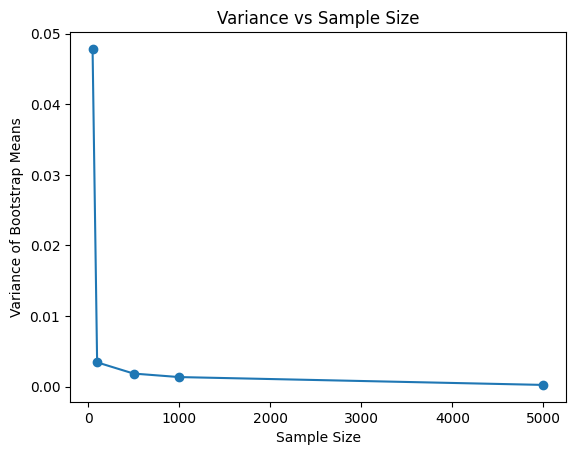

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def bootstrap_pareto_variance(sample_size, n_bootstrap=1000, shape=2.5):
    # Generate original sample from Pareto distribution
    original_sample = np.random.pareto(shape, sample_size)
    bootstrap_means = []
    
    # Perform bootstrap resampling
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(original_sample, size=sample_size, replace=True)
        bootstrap_means.append(np.mean(bootstrap_sample))
    
    return np.var(bootstrap_means)

# Test with different sample sizes
sample_sizes = [50, 100, 500, 1000, 5000]
variances = []

for size in sample_sizes:
    var = bootstrap_pareto_variance(size)
    variances.append(var)
    print(f"Sample size: {size}, Variance of mean: {var:.4f}")

# Plot results
plt.plot(sample_sizes, variances, marker='o')
plt.xlabel('Sample Size')
plt.ylabel('Variance of Bootstrap Means')
plt.title('Variance vs Sample Size')
plt.show()


In [ ]:
# Method 2: Stratified by W (Conditional on W)
import pandas as pd
import numpy as np

# Create bins for W (narrow ranges)
n_bins = 20
df['W_bin'] = pd.qcut(df['W'], q=n_bins, labels=False, duplicates='drop')

# Calculate effect within each stratum
stratum_effects = []
for bin_num in df['W_bin'].unique():
    stratum_data = df[df['W_bin'] == bin_num]
    
    # Need both Z=0 and Z=1 in the stratum
    if stratum_data['Z'].nunique() == 2:
        stratum_z1 = stratum_data[stratum_data['Z'] == 1]
        stratum_z0 = stratum_data[stratum_data['Z'] == 0]
        
        Y_diff = stratum_z1['Y'].mean() - stratum_z0['Y'].mean()
        X_diff = stratum_z1['X'].mean() - stratum_z0['X'].mean()
        
        if abs(X_diff) > 0.001:
            stratum_effects.append(Y_diff / X_diff)

# Average effects across strata
stratified_effect = np.mean(stratum_effects)


NameError: name 'df' is not defined